In [1]:
import sys
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
%matplotlib inline

## Loading Files

 - Set up the environment variable
 - Load csv of each city

In [13]:
DIR_PATH =  os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
FRANCE_PATH = os.path.join(DATA_PATH + os.sep, "France")
LYON_PATH = os.path.join(FRANCE_PATH + os.sep, "Lyon" + os.sep)
PARIS_PATH = os.path.join(FRANCE_PATH + os.sep, "Paris" + os.sep)
BDX_PATH = os.path.join(FRANCE_PATH + os.sep, "Bordeaux" + os.sep)

In [24]:
bdx_listings = pd.read_csv(BDX_PATH+"listings.csv", low_memory=False)
bdx_reviews = pd.read_csv(BDX_PATH+"reviews.csv", low_memory=False)

In [25]:
bdx_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,28925,https://www.airbnb.com/rooms/28925,20181118040645,2018-11-18,En el centro :Cuartos privados en casa familial,Vivo en una casa grande que comparto todo el a...,"In the city center of Bordeaux , in the family...","In the city center of Bordeaux , in the family...",none,"Ein paar Minuten zu Fuß von der Innenstadt , d...",...,t,NaN,{BORDEAUX},f,f,strict_14_with_grace_period,f,f,2,0.14
1,40151,https://www.airbnb.com/rooms/40151,20181118040645,2018-11-18,Sunny flat aux Chartrons,"Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...",none,Le quartier des Chartrons est situé dans le ce...,...,t,NaN,{BORDEAUX},f,f,moderate,f,f,1,0.30
2,144343,https://www.airbnb.com/rooms/144343,20181118040645,2018-11-18,Home between Bordeaux & vineyards,"Recent 140m2 home, 300m walk to tram stop (5 s...",NaN,"Recent 140m2 home, 300m walk to tram stop (5 s...",none,Residential neighborhood.,...,t,NaN,{BEGLES},f,f,moderate,f,f,1,NaN
3,185534,https://www.airbnb.com/rooms/185534,20181118040645,2018-11-18,L'Echoppe des Bouilles,NaN,L’Échoppe des Bouilles est une maison typique ...,L’Échoppe des Bouilles est une maison typique ...,none,NaN,...,t,NaN,{BORDEAUX},f,f,strict_14_with_grace_period,f,f,1,NaN
4,218103,https://www.airbnb.com/rooms/218103,20181118040645,2018-11-18,B&B (Website hidden by Airbnb) tropical garden,Ce studio spacieux de 35 m² est tout équipé po...,"The Bambooyard : ""Le clos des Bambous"", in Bè...","The Bambooyard : ""Le clos des Bambous"", in Bè...",none,Idéalement situé Bordeaux Sud à l'entrée de Bè...,...,t,NaN,{BEGLES},f,f,strict_14_with_grace_period,f,f,4,0.29


In [26]:
bdx_listings = bdx_listings.loc[:,['id', 'room_type', 'host_id', 'host_since', 'host_response_rate', 'reviews_per_month', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 
'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_rating', 'price', 'cleaning_fee', 'zipcode', 'number_of_reviews']]


In [27]:
bdx_listings = bdx_listings.dropna(subset=['id', 'room_type', 'host_id', 'host_since', 'reviews_per_month', 'price', 'zipcode' ])
bdx_listings

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
0,28925,Private room,124398,2010-05-13,NaN,0.14,9.0,10.0,10.0,10.0,9.0,100.0,$24.00,$23.00,33000,2
1,40151,Entire home/apt,165163,2010-07-13,NaN,0.30,9.0,9.0,10.0,10.0,10.0,94.0,$71.00,$10.00,33300,30
4,218103,Private room,1127981,2011-09-08,90%,0.29,9.0,8.0,10.0,10.0,10.0,93.0,$100.00,NaN,33130,25
5,222887,Entire home/apt,1156398,2011-09-14,100%,0.39,9.0,10.0,10.0,10.0,9.0,93.0,$155.00,$100.00,33000,33
6,317273,Entire home/apt,1156398,2011-09-14,100%,0.33,9.0,10.0,10.0,10.0,10.0,98.0,$130.00,$80.00,33000,17
7,317658,Entire home/apt,1156398,2011-09-14,100%,0.60,9.0,10.0,10.0,10.0,9.0,97.0,$150.00,$100.00,33000,49
8,333031,Entire home/apt,1697156,2012-02-04,100%,2.61,10.0,10.0,10.0,10.0,10.0,98.0,$75.00,$15.00,33000,211
9,333592,Entire home/apt,1699300,2012-02-04,100%,0.31,9.0,9.0,10.0,10.0,9.0,95.0,$80.00,$30.00,33000,24
10,365993,Entire home/apt,1847986,2012-03-03,100%,0.30,9.0,9.0,10.0,10.0,10.0,98.0,$85.00,$40.00,33130,24
11,400306,Entire home/apt,1998044,2012-03-24,NaN,0.67,9.0,10.0,10.0,10.0,10.0,96.0,$60.00,$15.00,33100,18


## Bordeaux Analysis

### Type of room and Price details

In [28]:
# sort by price
bdx_listings_per_price = bdx_listings.sort_values(by="price")
bdx_listings_per_price

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
8675,26433722,Entire home/apt,177486969,2018-03-09,92%,1.00,10.0,10.0,10.0,10.0,10.0,100.0,"$1,000.00",NaN,33400,1
8676,26433724,Entire home/apt,177486969,2018-03-09,92%,2.73,9.0,9.0,9.0,9.0,9.0,84.0,"$1,000.00",NaN,33400,9
7821,24572394,Shared room,134816584,2017-06-13,100%,3.61,10.0,9.0,10.0,10.0,8.0,89.0,$10.00,$0.00,33170,23
9780,29606634,Private room,67318621,2016-04-15,70%,2.00,10.0,10.0,10.0,10.0,10.0,100.0,$10.00,NaN,33520,2
5409,18993252,Entire home/apt,132486357,2017-05-29,NaN,0.06,10.0,10.0,10.0,10.0,10.0,100.0,$100.00,$25.00,33130,1
3040,13091768,Entire home/apt,72677297,2016-05-18,NaN,0.13,10.0,10.0,10.0,10.0,10.0,100.0,$100.00,NaN,33000,1
5401,18973293,Entire home/apt,6289940,2013-05-08,60%,0.18,8.0,10.0,8.0,10.0,10.0,100.0,$100.00,$100.00,33000,2
404,3120255,Entire home/apt,15767459,2014-05-20,78%,0.10,9.0,10.0,10.0,9.0,10.0,96.0,$100.00,NaN,33300,5
5353,18875230,Entire home/apt,91417277,2016-08-23,90%,1.83,9.0,10.0,9.0,10.0,8.0,87.0,$100.00,$60.00,33800,33
5338,18853013,Entire home/apt,131331048,2017-05-21,NaN,0.34,10.0,10.0,10.0,10.0,10.0,97.0,$100.00,$20.00,33000,6


In [29]:
bdx_listings.price = [x.strip('$') for x in bdx_listings.price]
bdx_listings.price = bdx_listings.price.apply(lambda x: x.replace(',',''))

In [30]:
#mean of price in bordeaux
bdx_listings["price"] = pd.to_numeric(bdx_listings["price"])
mean_price_bdx = bdx_listings.price.mean()
print("Mean price in bordeaux per night : "+str(mean_price_bdx) + " $ ")

Mean price in bordeaux per night : 76.08900784264907 $ 


<function matplotlib.pyplot.show(*args, **kw)>

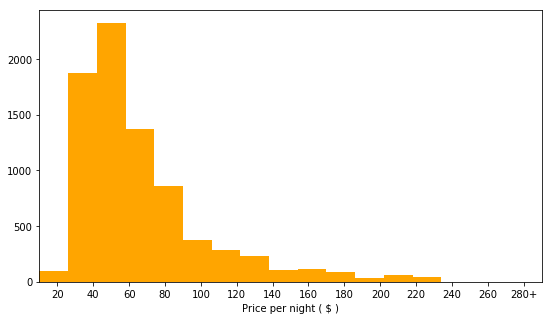

In [31]:
price_bdx = bdx_listings['price']
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,20)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)
plt.xlabel("Price per night ( $ )")
plt.hist(price_bdx, color='orange', bins = bins)
plt.show

In [32]:
total_houses_bdx= len(bdx_listings)
print("Total of houses in bordeaux having datas : " + str(total_houses_bdx))

Total of houses in bordeaux having datas : 8033


In [33]:
# Type of room 
bdx_room = bdx_listings
bdx_entire_house = bdx_room.loc[bdx_room['room_type'] == "Entire home/apt"]
bdx_private_room = bdx_room.loc[bdx_room['room_type'] == "Private room"]
bdx_total_private_room = len(bdx_private_room)
print("Total of private room in Bordeaux having datas : "+str(bdx_total_private_room))
print("("+str(bdx_total_private_room/total_houses_bdx *100)+"%)")
print("------------------------------------------------------------")
bdx_total_entire_house = (len(bdx_listings)-len(bdx_private_room))
percentage_entire_house = bdx_total_entire_house/total_houses_bdx *100 
print("Total of entire house in Bordeaux having datas : "+str(bdx_total_entire_house))
print("("+str(percentage_entire_house)+"%)")

Total of private room in Bordeaux having datas : 1838
(22.880617453006348%)
------------------------------------------------------------
Total of entire house in Bordeaux having datas : 6195
(77.11938254699365%)


In [34]:
# Comparison between private and entire house
bdx_private_room_mean_price = bdx_private_room.price.mean()
print("Mean price of private room in lyon : "+str(bdx_private_room_mean_price))
#------------------------------
bdx_entire_house_mean_price = bdx_entire_house.price.mean()
print("Mean price of entire house in lyon : "+str(bdx_entire_house_mean_price))

Mean price of private room in lyon : 40.60990206746464
Mean price of entire house in lyon : 87.10063507572056


In [35]:
ttest_ind(bdx_private_room['price'], bdx_entire_house['price'])

Ttest_indResult(statistic=-17.28089031309046, pvalue=1.0203208501337252e-65)

**Summary**

Number of listing in lyon : 
   - Total : 8 033
   - Private room : 1 838 (22.88%)
   - Entire house : 6 195 (77.12%)

Mean price in lyon : 
   - Total : 76.09
   - Private room : 40.61
   - Entire house : 87.10

### Activity

Checking reviews/listing/month

In [38]:
review_per_month_mean = bdx_room.reviews_per_month.mean()
print("Mean of review per month per listing : "+str(review_per_month_mean))

Mean of review per month per listing : 1.3304556205651685


In [39]:
total_reviews_bdx = len(bdx_reviews)
first_reviews = min(bdx_reviews['date'])
print("Total reviews since "+str(first_reviews)+" : "+str(total_reviews_bdx))
print("----------------------------------------")
bdx_reviews['date'] = pd.to_datetime(bdx_reviews["date"])
year_selection = bdx_reviews.loc[:,['date']]
year_reviews = year_selection.groupby(year_selection.date.dt.year).count()
print("Total reviews per year")
year_reviews

Total reviews since 2010-09-18 : 181206
----------------------------------------
Total reviews per year


,date
date,
2010,1
2011,6
2012,178
2013,1060
2014,3890
2015,13112
2016,32394
2017,55376
2018,75189


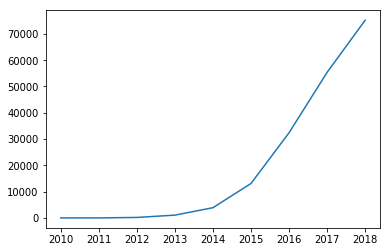

In [40]:
plt.plot(year_reviews)

**Summary** 
- Mean review per month per listing : 1.16
- Total reviews since 2010-10-18 : 171503
- Total reviews per year : 

|Year   |Count|
|---	|---	|
|2009|0|
|2010|1|
|2011|6|
|2012|178|
|2013|1060|
|2014|3890|
|2015|13112|
|2016|32394|
|2017|55376|
|2018|75189|


### Saving csv

In [41]:
bdx_listings_per_price.to_csv(r'data\France\Bordeaux\clean_bdx_listing.csv')
price_bdx.to_csv(r'data\France\Bordeaux\price_bdx.csv')
bdx_entire_house.to_csv(r'data\France\Bordeaux\bdx_entire_house.csv')
bdx_private_room.to_csv(r'data\France\Bordeaux\bdx_private_room.csv')

year_reviews.to_csv(r'data\France\Bordeaux\year_reviews.csv')